# Project E8: KAGGLE - TWO PATHS TO PREDICTING SUCCESS

Project for IDS course 2025. By Nele-Liis Võhma and Marek Kalda.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

## 1. Exploring the dataset

In [2]:
data = pd.read_csv("StudentPerformanceFactors.csv")

In [3]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
data.shape

(6607, 20)

In [5]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Final label exploration

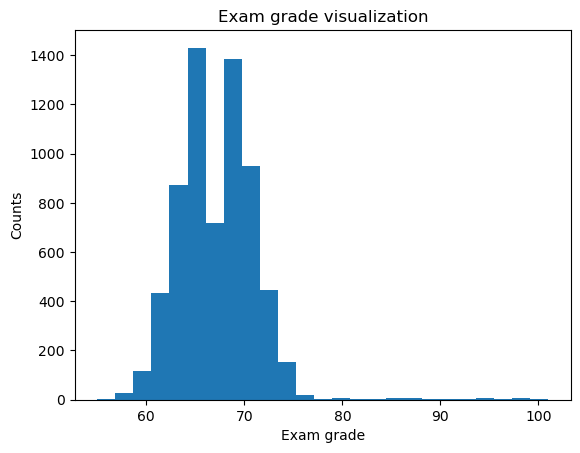

In [7]:
data["Exam_Score"].plot(
    kind="hist",
    bins=25
)

plt.title("Exam grade visualization")
plt.xlabel("Exam grade")
plt.ylabel("Counts")
plt.show()

In [8]:
print("Grade range:", data["Exam_Score"].min(), "-", data["Exam_Score"].max())
print("Missing values count:", data["Exam_Score"].isna().sum())

Grade range: 55 - 101
Missing values count: 0


In [9]:
data[data["Exam_Score"] == 101] ## Everything other than the exam score seems normal

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101


In [10]:
data.loc[data["Exam_Score"] == 101, "Exam_Score"] = 100

In [11]:
print("Max grade after changes:", data["Exam_Score"].max())

Max grade after changes: 100


### Missing values per each column

In [12]:
data.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [13]:
data = data.dropna()

In [14]:
data.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [15]:
data.shape

(6378, 20)

In [16]:
data.drop_duplicates()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [1]:
#for col in data.columns: # Check for any outliers and spelling errors
#    print(f"Column {col}")
#    print(data[col].value_counts(dropna=False))
#    print("-"*40)
    

In [18]:
# Correlation matrix
corr = data.corr(numeric_only=True)

# Focus on correlation with final_grade
print(corr['Exam_Score'].sort_values(ascending=False))

Exam_Score           1.000000
Attendance           0.580394
Hours_Studied        0.445209
Previous_Scores      0.174292
Tutoring_Sessions    0.156769
Physical_Activity    0.025155
Sleep_Hours         -0.017149
Name: Exam_Score, dtype: float64


In [19]:
data_dummies_eval = pd.get_dummies(data) # Needs to be used
corr_values = data_dummies_eval.corr()['Exam_Score'].sort_values(ascending=False)

# Filter only values greater than 0.02
filtered_corr = corr_values[abs(corr_values) < 0.02]

print(filtered_corr)

Parental_Education_Level_College    0.017985
School_Type_Private                 0.010898
Gender_Female                       0.004887
Gender_Male                        -0.004887
Peer_Influence_Neutral             -0.007443
School_Type_Public                 -0.010898
Sleep_Hours                        -0.017149
Name: Exam_Score, dtype: float64


## 3. Training regression models

### Methods for the process

#### Finding dummies

In [20]:
def get_dummies(data):
    data_dummies = pd.get_dummies(data, drop_first=True) 
    
    X = data_dummies.drop(columns=["Exam_Score"])
    y = data_dummies["Exam_Score"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
    
    scaler = StandardScaler() ## Doesnt work yet
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

#### MSE and RMSE

In [21]:
def MSE(y_target, y_pred):
    return np.mean((y_target - y_pred)**2)

def RMSE(y_target, y_pred):
    return np.sqrt(MSE(y_target, y_pred))

#### Finding best alpha for Lasso and Ridge models using cross validation.

In [22]:
def get_best_alpha(model,X,y,alphas): ### Find best alpha for Ridge and Lasso using cross-val
    kf = KFold(n_splits=3, random_state = 0, shuffle=True)
    results = []
    for alpha in alphas:
        model.set_params(alpha=alpha)
        for train_indexes, val_indexes in kf.split(X):
            X_train, X_val = X.values[train_indexes], X.values[val_indexes]
            y_train, y_val = y.values[train_indexes], y.values[val_indexes]

            model.fit(X_train, y_train)
            rmse = RMSE(y_val,model.predict(X_val))
            results.append((alpha, rmse))
   

    best_alpha, rmse = sorted(results, key=lambda x: x[1])[0]
    return best_alpha, rmse

#### Hyperparameter tuning for Random Forest Regressor

In [4]:
def get_best_random_forest(X, y): ### Hyper-Parameter tuning for Random Forest Regressor
    param_grid = {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }

    rf = RandomForestRegressor(random_state=5)

    grid = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=3,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1
    )

    grid.fit(X, y)
    print(grid.best_params_)

    return grid.best_estimator_

#### Method that trains all of the models

In [24]:
def run_models(X_train, X_test, y_train, y_test):

    ridge_alphas = np.linspace(0.1, 10, 100)
    lasso_alphas = np.linspace(0.001, 5, 100)
    
    ridge_best_alpha, rmse = get_best_alpha(lm.Ridge(), X_train, y_train, ridge_alphas)
    lasso_best_alpha, rmse = get_best_alpha(lm.Lasso(), X_train, y_train, lasso_alphas)

    #rf_best_model= get_best_random_forest(X_train, y_train) ### If hyperparameter tuning is wanted
    
    models = {
        "Linear": lm.LinearRegression(),
        "Ridge": lm.Ridge(alpha=ridge_best_alpha),
        "Lasso": lm.Lasso(alpha=lasso_best_alpha),
        "RandomForest": RandomForestRegressor(random_state=5) #rf_best_model, ### for hyperparameter tuning
    }
    
    results = []
    
    for name, model in models.items():

        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        results.append({
            "Model": name,
            "y_train_pred": y_train_pred,
            "y_test_pred": y_test_pred
        })

    return (models, results)


#### Finds RMSE and R2 scores for all the models using results from the previous method

In [25]:
def find_scores(y_train, y_test, results):

    scores = []
    for res in results:
        model_name = res["Model"]
        y_train_pred = res["y_train_pred"]
        y_test_pred = res["y_test_pred"]
        
        train_rmse = RMSE(y_train, y_train_pred)
        test_rmse = RMSE(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        scores.append({
                "Model": model_name,
                "Train RMSE": round(train_rmse, 5),
                "Test RMSE": round(test_rmse, 5),
                "Train R2": round(train_r2, 5),
                "Test R2": round(test_r2, 5)
            })
    
    scores_df = pd.DataFrame(scores)
    print(scores_df)
    return scores

#### Plots predicted vs actual data

In [26]:
def analysis(y_true, y_pred, data_type, model_name="Model"):

    # Predicted vs Actual    
    plt.scatter(y_pred, y_true, alpha=0.7)
    plt.plot([y_true.min(), y_true.max()],
             [y_true.min(), y_true.max()],
             'r--')  # diagonal line
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} : Predicted vs Actual")
    
    plt.show()

#### Initial test

In [27]:
X_train, X_test, y_train, y_test = get_dummies(data)
models, results = run_models(X_train, X_test, y_train, y_test)

In [28]:
scores = find_scores(y_train, y_test, results)

          Model  Train RMSE  Test RMSE  Train R2  Test R2
0        Linear     2.05784    2.08933   0.72275  0.71711
1         Ridge     2.05794    2.08978   0.72272  0.71699
2         Lasso     2.05790    2.08987   0.72273  0.71697
3  RandomForest     0.94583    2.53692   0.94143  0.58292


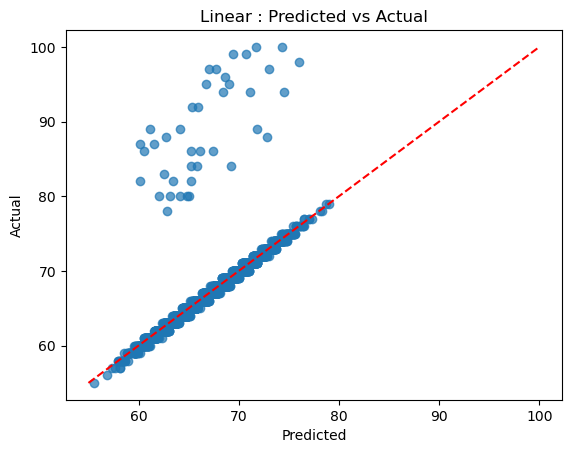

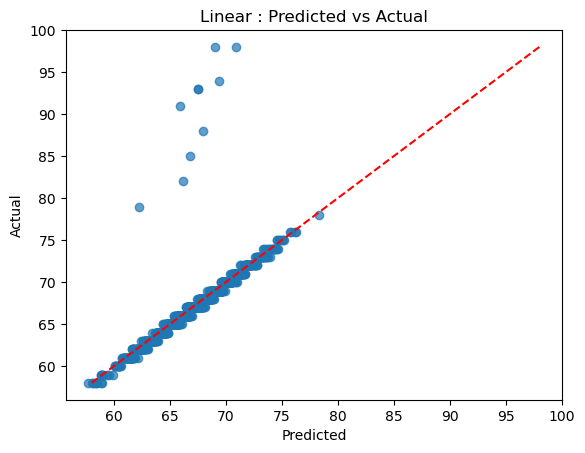

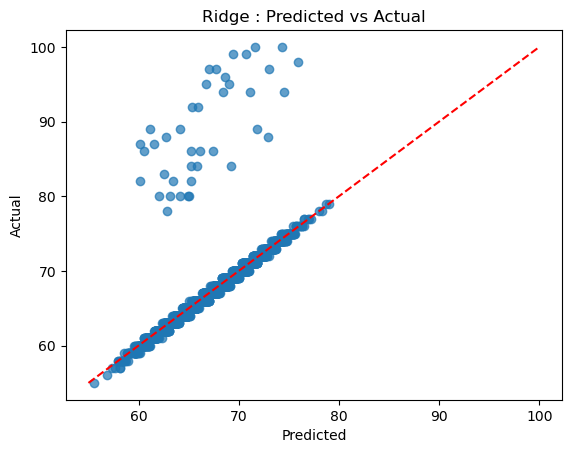

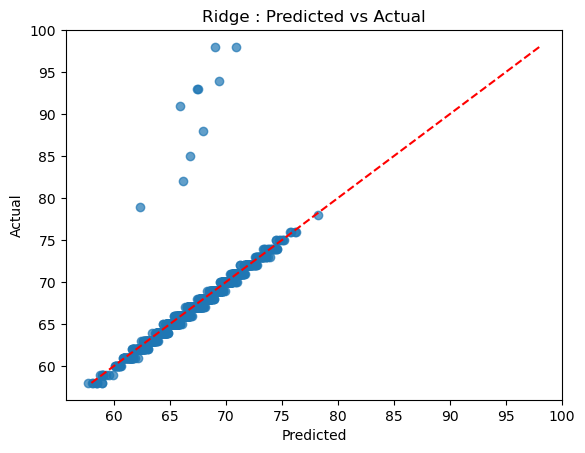

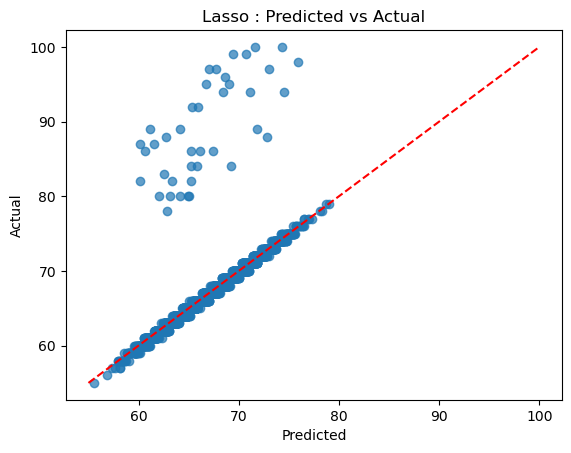

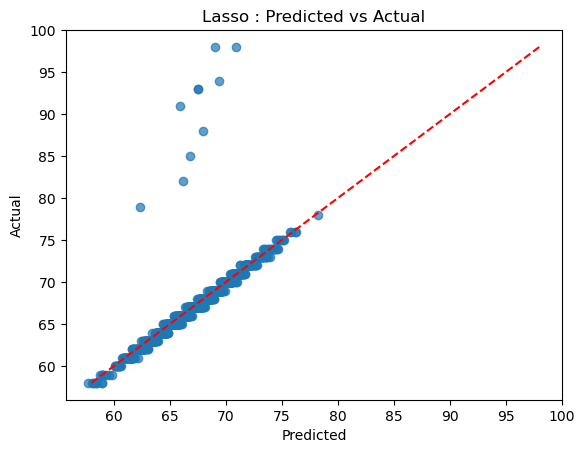

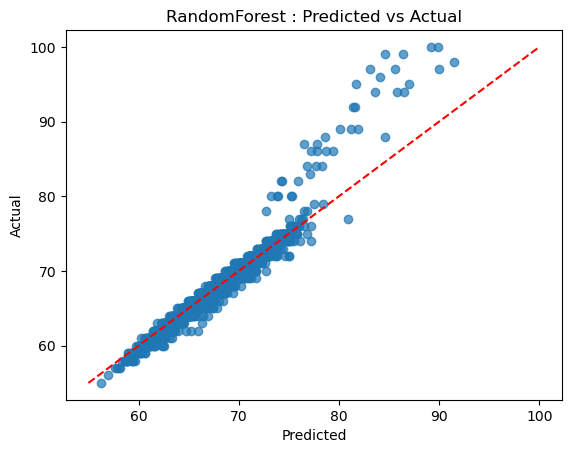

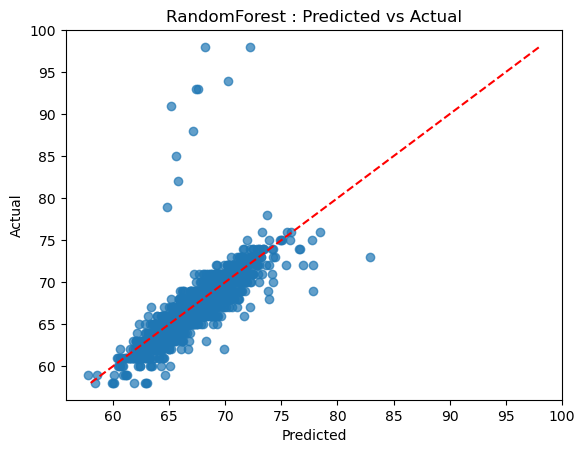

In [29]:
for res in results:
    analysis(y_train, res["y_train_pred"], "train", res["Model"])
    analysis(y_test, res["y_test_pred"], "test", res["Model"])

#### Checking feature importance

In [33]:
coeffs = pd.Series(models["Linear"].coef_, index=X_train.columns).sort_values(ascending=False)

# print(coeffs)

In [5]:
coeffs = pd.Series(models["Ridge"].coef_, index=X_train.columns).sort_values(ascending=False)

#print(coeffs)

NameError: name 'pd' is not defined

In [6]:
coeffs = pd.Series(models["Lasso"].coef_, index=X_train.columns).sort_values(ascending=False)

#print(coeffs)

NameError: name 'pd' is not defined

In [7]:
importances = pd.Series(models2["RandomForest"].feature_importances_, index=X_train2.columns).sort_values(ascending=False)
#print(importances)

NameError: name 'pd' is not defined

#### Test with some feature engineering

In [30]:
data_less_features = data.drop(columns=["Gender", "Sleep_Hours"])
X_train2, X_test2, y_train2, y_test2 = get_dummies(data_less_features)

models2, results2 = run_models(X_train2, X_test2, y_train2, y_test2)

scores = find_scores(y_train2, y_test2, results2)
print(scores)

for res in results2:
    analysis(y_train2, res["y_train_pred"], "train", res["Model"])
    analysis(y_test2, res["y_test_pred"], "test", res["Model"])

#### Plot for the poster

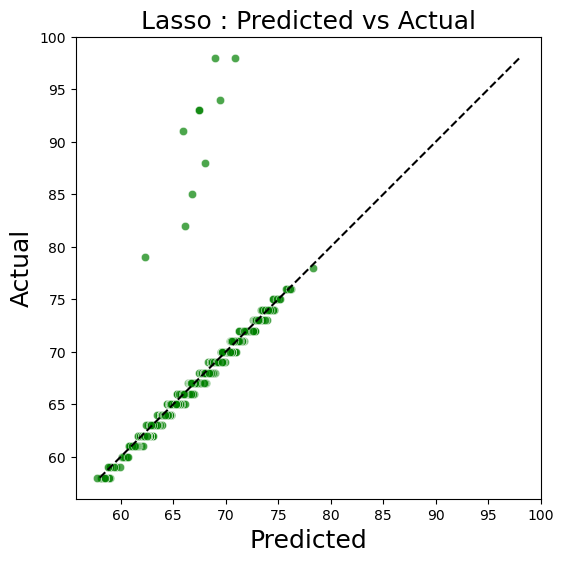

In [37]:
### For the poster

y_true = y_test
y_pred = results[2]["y_test_pred"]

df = pd.DataFrame({
    "Predicted": y_pred,
    "Actual": y_true
})

plt.figure(figsize=(6,6))

sns.scatterplot(data=df, x="Predicted", y="Actual", color="green", alpha=0.7)

plt.plot([y_true.min(), y_true.max()],
         [y_true.min(), y_true.max()],
         color="black", linestyle="--")

# Labels and title
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.title("Lasso : Predicted vs Actual", fontsize=18)

plt.savefig("Lasso_Pred_Actual.pdf")
plt.show()